In [1]:
from openbb_terminal.sdk import openbb

import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd

In [2]:
def ticker_to_yahoo_format(t):
    return '.'.join(t.split(':')[::-1])[:-1]

In [3]:
BA = ("""HKG:0388
HKG:1299
HKG:3968
HKG:0939
HKG:3988""", 'BA')
CU = ("""HKG:2331
HKG:0669
HKG:2020
HKG:6969
HKG:0288
HKG:9988
HKG:2015
HKG:9866
HKG:9618
HKG:9868""", 'CU')
CO = ("""HKG:0338
HKG:2600
HKG:0857
HKG:0386
HKG:0836
HKG:1088
HKG:2688""", 'CO')
IT = ("""HKG:0992
HKG:1810
HKG:0268
HKG:1347
HKG:3888""", 'IT')
TC = ("""HKG:2518
HKG:1024
HKG:9888
HKG:9999
HKG:9626
HKG:0700""", 'TC')
RE = ("""HKG:2007
HKG:6098
HKG:0688
HKG:0960
HKG:1928
HKG:1109
HKG:1113""", 'RE')

In [4]:
for tickers, field in [BA, CU, CO, IT, TC, RE]:
    for ticker in tickers.split('\n'):
        data = openbb.stocks.load(ticker_to_yahoo_format(ticker))
        fig, axlist = mpf.plot(
            data,
            type='line',
            mav=(50, 200),
            volume=True,
            show_nontrading=True,
            figsize=(10, 4), xrotation=90, tight_layout=True, returnfig=True)
        axlist[-2].xaxis.set_ticks(data.index[::len(data)//20])
        axlist[-2].set_xticklabels(data.index[::len(data)//20].strftime('%Y.%m.%d'))
        axlist[0].legend()
        axlist[0].set_title(
            field + ' | ' + ticker + ' | ' + f'{data.index[-1].date()}: Price={data["Close"][-1]:.2f}, MA50={data["Close"].rolling(window=50).mean()[-1]:.2f}'
            f', MA200={data["Close"].rolling(window=200).mean()[-1]:.2f}',
            loc='left')
        plt.savefig(f'entry_images/{field}_{ticker}_whole.jpg', format='jpg', bbox_inches='tight')
        plt.close()
        
        fig, axlist = mpf.plot(
            data,
            type='candle',
            mav=(50, 200),
            volume=True,
            show_nontrading=True,
            figsize=(10, 4), xrotation=90, tight_layout=True, returnfig=True, warn_too_much_data=2020000000)

        mask = data.index > data.index[-1] - datetime.timedelta(days=180)
        ymax = max(
            data.loc[mask, 'High'].max(),
            data['Close'].rolling(window=50).mean()[mask].max(),
            data['Close'].rolling(window=200).mean()[mask].max()
        ) * 1.05
        ymin = min(
            data.loc[mask, 'Low'].min(),
            data['Close'].rolling(window=50).mean()[mask].min(),
            data['Close'].rolling(window=200).mean()[mask].min()
        ) * 0.95

        axlist[-2].xaxis.set_ticks(data.index[::len(data)//100])
        axlist[-2].set_xticklabels(data.index[::len(data)//100].strftime('%Y.%m.%d'))
        axlist[-2].set_xlim(data.index[-1] - datetime.timedelta(days=180), data.index[-1])
        axlist[0].set_ylim(ymin, ymax)
        axlist[0].set_xlim(data.index[-1] - datetime.timedelta(days=180), data.index[-1])
        axlist[0].legend()
        axlist[0].set_title(
            field + ' | ' + ticker + ' | ' + f'{data.index[-1].date()}: Price={data["Close"][-1]:.2f}, MA50={data["Close"].rolling(window=50).mean()[-1]:.2f}'
            f', MA200={data["Close"].rolling(window=200).mean()[-1]:.2f}',
            loc='left')
        plt.savefig(f'entry_images/{field}_{ticker}_6m.jpg', format='jpg', bbox_inches='tight')
        plt.close()


Loading Daily data for 0388.HK with starting period 2019-12-30.

Loading Daily data for 1299.HK with starting period 2019-12-30.

Loading Daily data for 3968.HK with starting period 2019-12-30.

Loading Daily data for 0939.HK with starting period 2019-12-30.

Loading Daily data for 3988.HK with starting period 2019-12-30.

Loading Daily data for 2331.HK with starting period 2019-12-30.

Loading Daily data for 0669.HK with starting period 2019-12-30.

Loading Daily data for 2020.HK with starting period 2019-12-30.

Loading Daily data for 6969.HK with starting period 2020-07-10.

Loading Daily data for 0288.HK with starting period 2019-12-30.

Loading Daily data for 9988.HK with starting period 2019-12-30.

Loading Daily data for 2015.HK with starting period 2021-08-12.

Loading Daily data for 9866.HK with starting period 2022-03-10.

Loading Daily data for 9618.HK with starting period 2020-06-18.

Loading Daily data for 9868.HK with starting period 2021-07-07.

Loading Daily data for 0338.HK with starting period 2019-12-30.

Loading Daily data for 2600.HK with starting period 2019-12-30.

Loading Daily data for 0857.HK with starting period 2019-12-30.

Loading Daily data for 0386.HK with starting period 2019-12-30.

Loading Daily data for 0836.HK with starting period 2019-12-30.

Loading Daily data for 1088.HK with starting period 2019-12-30.

Loading Daily data for 2688.HK with starting period 2019-12-30.

Loading Daily data for 0992.HK with starting period 2019-12-30.

Loading Daily data for 1810.HK with starting period 2019-12-30.

Loading Daily data for 0268.HK with starting period 2019-12-30.

Loading Daily data for 1347.HK with starting period 2019-12-30.

Loading Daily data for 3888.HK with starting period 2019-12-30.

Loading Daily data for 2518.HK with starting period 2021-03-15.

Loading Daily data for 1024.HK with starting period 2021-02-05.

Loading Daily data for 9888.HK with starting period 2021-03-23.

Loading Daily data for 9999.HK with starting period 2020-06-11.

Loading Daily data for 9626.HK with starting period 2021-03-29.

Loading Daily data for 0700.HK with starting period 2019-12-30.

Loading Daily data for 2007.HK with starting period 2019-12-30.

Loading Daily data for 6098.HK with starting period 2019-12-30.

Loading Daily data for 0688.HK with starting period 2019-12-30.

Loading Daily data for 0960.HK with starting period 2019-12-30.

Loading Daily data for 1928.HK with starting period 2019-12-30.

Loading Daily data for 1109.HK with starting period 2019-12-30.

Loading Daily data for 1113.HK with starting period 2019-12-30.

In [126]:
ymin, ymax

(1.0, 6.335449997186661)

<AxesSubplot: xlabel='date'>

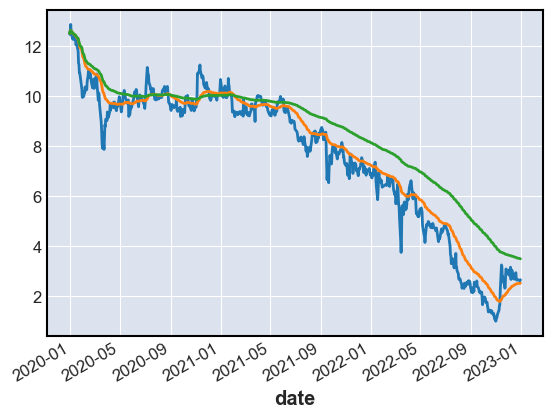

In [92]:
data

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2019-12-30,55.299999,55.799999,55.049999,55.799999,49.333168,3609764
2019-12-31,55.299999,56.299999,55.299999,56.250000,49.731018,3071107
2020-01-02,56.099998,56.650002,55.500000,55.950001,49.465786,3712586
2020-01-03,56.799999,56.799999,55.500000,55.650002,49.200558,3623342
2020-01-06,55.549999,55.549999,54.450001,54.849998,48.493263,4171199
...,...,...,...,...,...,...
2022-12-22,47.599998,48.450001,47.500000,48.299999,48.299999,4258183
2022-12-23,47.700001,48.500000,47.700001,48.250000,48.250000,2427602
2022-12-28,48.650002,48.750000,47.900002,48.000000,48.000000,3216763
